# Análisis de Clustering usando K-Means y DBSCAN

En esta tarea, se ha generado un conjunto de datos artificialmente en dos dimensiones. Los datos están distribuidos en tres grupos centrados alrededor de los puntos (0, 0), (1, 2) y (2, 0). Posteriormente, aplicaremos los algoritmos de clustering **K-Means** y **DBSCAN** para agrupar los datos y visualizarlos.



## 1. Lectura de los datos desde un archivo CSV

Comenzamos leyendo el archivo `points.csv` para obtener las coordenadas de los puntos.


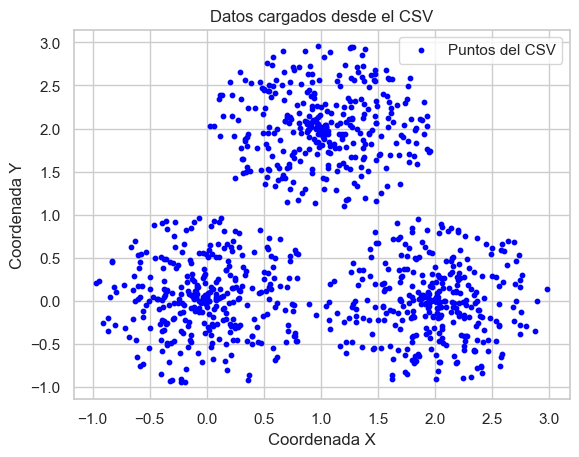

In [16]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score

# Configuramos el estilo de Seaborn
sns.set(style='whitegrid', palette='muted')


# Lectura de los datos desde el archivo CSV
data = pd.read_csv('points.csv')

# Convertimos los datos a un array de NumPy para trabajar con ellos
X = data[['Coordinate X', 'Coordinate Y']].values

# Visualizamos los primeros datos para verificar que se cargaron correctamente
data.head()

# Visualizamos los puntos generados
plt.scatter(X[:, 0], X[:, 1], s=10, color='blue', label='Puntos del CSV')
plt.title('Datos cargados desde el CSV')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.show()

## 2. Aplicación del algoritmo K-Means

Aplicamos el algoritmo K-Means para agrupar los puntos en tres clusters.


C:\Users\Administrador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Administrador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


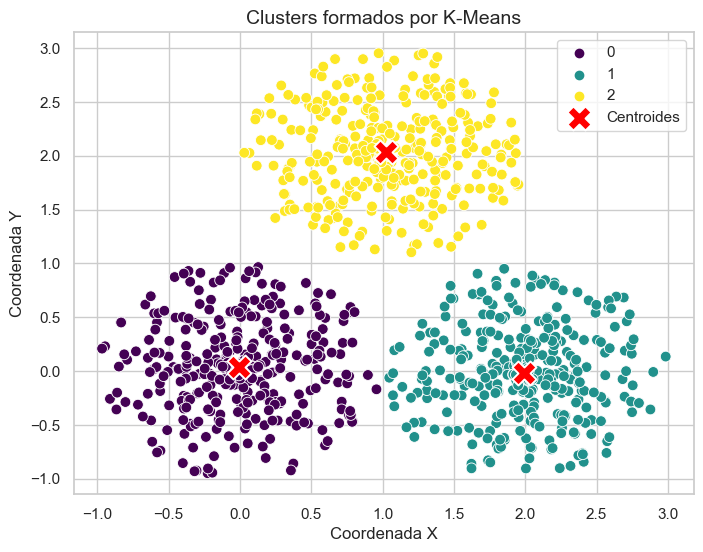

In [17]:
from sklearn.cluster import KMeans

# Aplicación del algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

# Visualización de los clusters formados por K-Means con Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels_kmeans, palette='viridis', s=60, legend='full')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                s=300, color='red', marker='X', label='Centroides')
plt.title("Clusters formados por K-Means", fontsize=14)
plt.xlabel("Coordenada X", fontsize=12)
plt.ylabel("Coordenada Y", fontsize=12)
plt.legend()
plt.show()


## 3. Aplicación del algoritmo DBSCAN

Aplicamos el algoritmo DBSCAN para identificar clusters basados en la densidad.


Clusters encontrados: 3
Puntos de ruido: 0


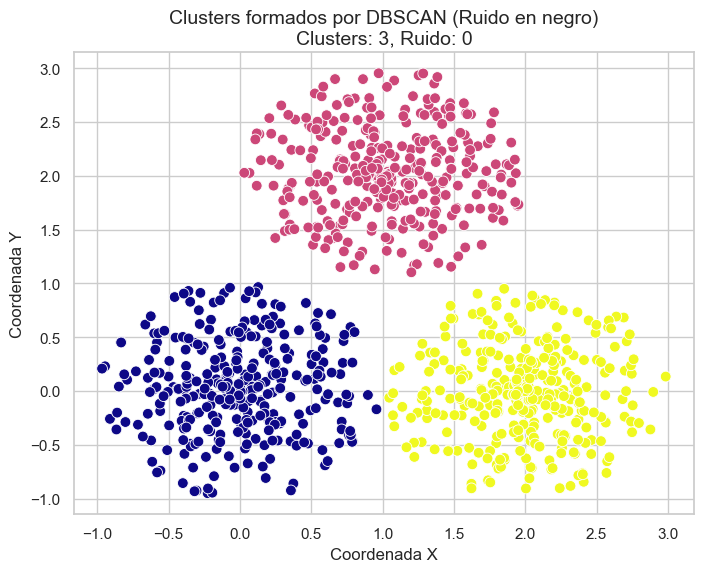

In [18]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicación del algoritmo DBSCAN
dbscan = DBSCAN(eps=0.58, min_samples=140)
labels_dbscan = dbscan.fit_predict(X)

# Revisamos cuántos puntos se marcaron como ruido
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)
print(f"Clusters encontrados: {n_clusters}")
print(f"Puntos de ruido: {n_noise}")

# Visualización de los clusters formados por DBSCAN
plt.figure(figsize=(8, 6))
# Los puntos con etiqueta -1 se consideran ruido y se colorean en negro
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels_dbscan, palette='plasma', s=60, legend=None)
plt.title(f"Clusters formados por DBSCAN (Ruido en negro)\nClusters: {n_clusters}, Ruido: {n_noise}", fontsize=14)
plt.xlabel("Coordenada X", fontsize=12)
plt.ylabel("Coordenada Y", fontsize=12)
plt.show()


In [21]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score

# Para K-Means
print("### Métricas para K-Means ###")

# Inertia (también conocida como WCSS - Within-Cluster Sum of Squares)
inertia_kmeans = kmeans.inertia_
print(f"Inertia para K-Means: {inertia_kmeans:.2f}")

# Cálculo del Silhouette Score para K-Means
silhouette_kmeans = silhouette_score(X, labels_kmeans)
print(f"Silhouette Score para K-Means: {silhouette_kmeans:.2f}")

# Homogeneity, Completeness y V-Measure
homogeneity_kmeans = homogeneity_score(labels_kmeans, labels_kmeans)
completeness_kmeans = completeness_score(labels_kmeans, labels_kmeans)
v_measure_kmeans = v_measure_score(labels_kmeans, labels_kmeans)
print(f"Homogeneity para K-Means: {homogeneity_kmeans:.2f}")
print(f"Completeness para K-Means: {completeness_kmeans:.2f}")
print(f"V-Measure para K-Means: {v_measure_kmeans:.2f}")

# Para DBSCAN
print("\n### Métricas para DBSCAN ###")


    # Cálculo del Silhouette Score para DBSCAN
silhouette_dbscan = silhouette_score(X, labels_dbscan)
print(f"Silhouette Score para DBSCAN: {silhouette_dbscan:.2f}")
    
    # Homogeneity, Completeness y V-Measure
homogeneity_dbscan = homogeneity_score(labels_dbscan, labels_dbscan)
completeness_dbscan = completeness_score(labels_dbscan, labels_dbscan)
v_measure_dbscan = v_measure_score(labels_dbscan, labels_dbscan)
print(f"Homogeneity para DBSCAN: {homogeneity_dbscan:.2f}")
print(f"Completeness para DBSCAN: {completeness_dbscan:.2f}")
print(f"V-Measure para DBSCAN: {v_measure_dbscan:.2f}")



### Métricas para K-Means ###
Inertia para K-Means: 334.83
Silhouette Score para K-Means: 0.63
Homogeneity para K-Means: 1.00
Completeness para K-Means: 1.00
V-Measure para K-Means: 1.00

### Métricas para DBSCAN ###
Silhouette Score para DBSCAN: 0.63
Homogeneity para DBSCAN: 1.00
Completeness para DBSCAN: 1.00
V-Measure para DBSCAN: 1.00
